**Content**
The Murder Accountability Project is the most complete database of homicides in the United States currently available. This dataset includes murders from the FBI's Supplementary Homicide Report from 1976 to the present and Freedom of Information Act data on more than 22,000 homicides that were not reported to the Justice Department. This dataset includes the age, race, sex, ethnicity of victims and perpetrators, in addition to the relationship between the victim and perpetrator and weapon used.

**Acknowledgements**
The data was compiled and made available by the Murder Accountability Project, founded by Thomas Hargrove.

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [39]:
data_full = pd.read_csv('data/database.csv', low_memory=False)

In [40]:
data_full.head()

,Record ID,Agency Code,Agency Name,Agency Type,City,State,Year,Month,Incident,Crime Type,...,Victim Ethnicity,Perpetrator Sex,Perpetrator Age,Perpetrator Race,Perpetrator Ethnicity,Relationship,Weapon,Victim Count,Perpetrator Count,Record Source
0,1,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,January,1,Murder or Manslaughter,...,Unknown,Male,15,Native American/Alaska Native,Unknown,Acquaintance,Blunt Object,0,0,FBI
1,2,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,March,1,Murder or Manslaughter,...,Unknown,Male,42,White,Unknown,Acquaintance,Strangulation,0,0,FBI
2,3,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,March,2,Murder or Manslaughter,...,Unknown,Unknown,0,Unknown,Unknown,Unknown,Unknown,0,0,FBI
3,4,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,April,1,Murder or Manslaughter,...,Unknown,Male,42,White,Unknown,Acquaintance,Strangulation,0,0,FBI
4,5,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,April,2,Murder or Manslaughter,...,Unknown,Unknown,0,Unknown,Unknown,Unknown,Unknown,0,1,FBI


In [41]:
data = data_full.drop(['Agency Code', 'Agency Type', 'Agency Name', 'Incident', 'Record Source'], axis=1)
data.head()

,Record ID,City,State,Year,Month,Crime Type,Crime Solved,Victim Sex,Victim Age,Victim Race,Victim Ethnicity,Perpetrator Sex,Perpetrator Age,Perpetrator Race,Perpetrator Ethnicity,Relationship,Weapon,Victim Count,Perpetrator Count
0,1,Anchorage,Alaska,1980,January,Murder or Manslaughter,Yes,Male,14,Native American/Alaska Native,Unknown,Male,15,Native American/Alaska Native,Unknown,Acquaintance,Blunt Object,0,0
1,2,Anchorage,Alaska,1980,March,Murder or Manslaughter,Yes,Male,43,White,Unknown,Male,42,White,Unknown,Acquaintance,Strangulation,0,0
2,3,Anchorage,Alaska,1980,March,Murder or Manslaughter,No,Female,30,Native American/Alaska Native,Unknown,Unknown,0,Unknown,Unknown,Unknown,Unknown,0,0
3,4,Anchorage,Alaska,1980,April,Murder or Manslaughter,Yes,Male,43,White,Unknown,Male,42,White,Unknown,Acquaintance,Strangulation,0,0
4,5,Anchorage,Alaska,1980,April,Murder or Manslaughter,No,Female,30,Native American/Alaska Native,Unknown,Unknown,0,Unknown,Unknown,Unknown,Unknown,0,1


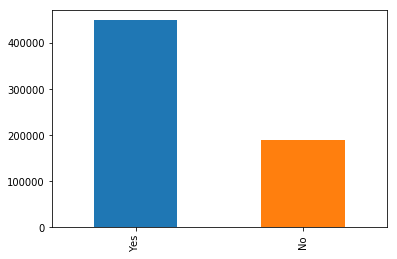

In [42]:
data['Crime Solved'].value_counts().plot.bar();

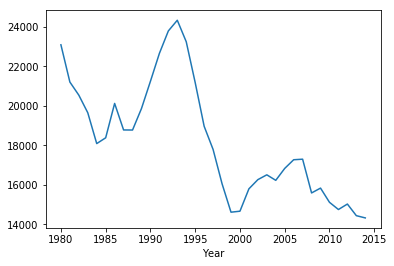

In [43]:
data.groupby('Year')['Record ID'].count().plot(); # homocide rate drops in general

In [44]:
data.corr()

,Record ID,Year,Victim Age,Victim Count,Perpetrator Count
Record ID,1.000000,0.997286,0.004774,0.026973,0.056755
Year,0.997286,1.000000,0.005514,0.026765,0.055959
Victim Age,0.004774,0.005514,1.000000,-0.008047,-0.017289
Victim Count,0.026973,0.026765,-0.008047,1.000000,0.067284
Perpetrator Count,0.056755,0.055959,-0.017289,0.067284,1.000000


In [45]:
def list_par(x,l):
    if x not in l :
        l[x]=len(l)
    return l

dic_city = {}
for city in data['City']:
    (list_par(city,dic_city))

dic_state = {}
for state in data['State']:
    (list_par(state,dic_state))
    
dic_crime_type = {}
for crime_type in data['Crime Type']:
    (list_par(crime_type,dic_crime_type))
    
dic_victim_race = {}
for victim_race in data['Victim Race']:
    (list_par(victim_race,dic_victim_race))
    
dic_victim_ethnicity = {}
for victim_ethnicity in data['Victim Ethnicity']:
    (list_par(victim_ethnicity,dic_victim_ethnicity))
    
dic_perpetrator_race = {}
for perpetrator_race in data['Perpetrator Race']:
    (list_par(perpetrator_race,dic_perpetrator_race))
    
dic_perpetrator_sex = {}
for perpetrator_sex in data['Perpetrator Sex']:
    (list_par(perpetrator_sex,dic_perpetrator_sex))
    
dic_perpetrator_ethnicity = {}
for perpetrator_ethnicity in data['Perpetrator Ethnicity']:
    (list_par(perpetrator_ethnicity,dic_perpetrator_ethnicity))
    
dic_relationship = {}
for relationship in data['Relationship']:
    (list_par(relationship,dic_relationship))

dic_weapon = {}
for weapon in data['Weapon']:
    (list_par(weapon,dic_weapon))

dic_month = {}
for month in data['Month']:
    (list_par(month,dic_month))
    
dic_sexe = {}
for sexe in data['Victim Sex']:
    (list_par(sexe,dic_sexe))
    
data['Month']=data['Month'].map(dic_month)
data['Victim Sex']=data['Victim Sex'].map(dic_sexe)
data['City']=data['City'].map(dic_city)
data['State']=data['State'].map(dic_state)
data['Crime Type']=data['Crime Type'].map(dic_crime_type)
data['Victim Race']=data['Victim Race'].map(dic_victim_race)
data['Victim Ethnicity']=data['Victim Ethnicity'].map(dic_victim_ethnicity)
data['Perpetrator Race']=data['Perpetrator Race'].map(dic_perpetrator_race)
data['Perpetrator Sex']=data['Perpetrator Sex'].map(dic_perpetrator_sex)
data['Perpetrator Ethnicity']=data['Perpetrator Ethnicity'].map(dic_perpetrator_ethnicity)
data['Relationship']=data['Relationship'].map(dic_relationship)
data['Weapon']=data['Weapon'].map(dic_weapon)

data.head()

,Record ID,City,State,Year,Month,Crime Type,Crime Solved,Victim Sex,Victim Age,Victim Race,Victim Ethnicity,Perpetrator Sex,Perpetrator Age,Perpetrator Race,Perpetrator Ethnicity,Relationship,Weapon,Victim Count,Perpetrator Count
0,1,0,0,1980,0,0,Yes,0,14,0,0,0,15,0,0,0,0,0,0
1,2,0,0,1980,1,0,Yes,0,43,1,0,0,42,1,0,0,1,0,0
2,3,0,0,1980,1,0,No,1,30,0,0,1,0,2,0,1,2,0,0
3,4,0,0,1980,2,0,Yes,0,43,1,0,0,42,1,0,0,1,0,0
4,5,0,0,1980,2,0,No,1,30,0,0,1,0,2,0,1,2,0,1


In [46]:
data.corr()

,Record ID,City,State,Year,Month,Crime Type,Victim Sex,Victim Age,Victim Race,Victim Ethnicity,Perpetrator Sex,Perpetrator Race,Perpetrator Ethnicity,Relationship,Weapon,Victim Count,Perpetrator Count
Record ID,1.000000,0.011507,0.019335,0.997286,-0.002908,0.013126,-0.012033,0.004774,0.043346,-0.145089,-0.021832,0.007124,-0.148547,-0.038810,0.020732,0.026973,0.056755
City,0.011507,1.000000,0.617363,-0.005734,-0.000398,0.005888,0.028421,0.005738,-0.033685,-0.123241,-0.027015,-0.030681,-0.055624,0.017251,-0.021907,0.022326,0.027980
State,0.019335,0.617363,1.000000,-0.008434,0.000538,-0.001567,0.026883,0.009923,-0.011386,-0.121125,-0.035136,0.011410,-0.041043,0.008045,-0.019444,0.017301,0.033385
Year,0.997286,-0.005734,-0.008434,1.000000,-0.003307,0.013883,-0.012848,0.005514,0.042410,-0.133392,-0.020695,0.005536,-0.140358,-0.036957,0.019581,0.026765,0.055959
Month,-0.002908,-0.000398,0.000538,-0.003307,1.000000,-0.001911,-0.003561,0.001424,-0.000291,0.008295,0.008740,-0.000316,-0.000207,-0.009023,-0.004715,-0.009747,-0.005997
Crime Type,0.013126,0.005888,-0.001567,0.013883,-0.001911,1.000000,0.006093,-0.027508,-0.040283,-0.011338,-0.015422,-0.056708,0.017340,0.078138,0.005490,-0.009313,-0.015232
Victim Sex,-0.012033,0.028421,0.026883,-0.012848,-0.003561,0.006093,1.000000,0.138596,-0.066019,-0.054954,-0.053238,-0.070065,-0.006465,0.138204,-0.166630,0.084750,-0.072526
Victim Age,0.004774,0.005738,0.009923,0.005514,0.001424,-0.027508,0.138596,1.000000,0.024342,-0.040897,0.025183,-0.028792,-0.033274,-0.017458,-0.065362,-0.008047,-0.017289
Victim Race,0.043346,-0.033685,-0.011386,0.042410,-0.000291,-0.040283,-0.066019,0.024342,1.000000,-0.229992,0.063413,0.558989,-0.159447,-0.072648,0.099148,-0.031628,-0.004931
Victim Ethnicity,-0.145089,-0.123241,-0.121125,-0.133392,0.008295,-0.011338,-0.054954,-0.040897,-0.229992,1.000000,-0.017918,-0.169884,0.703251,0.022611,0.026184,-0.023465,-0.015108


In [47]:
import matplotlib.pyplot as plt
import seaborn as sns

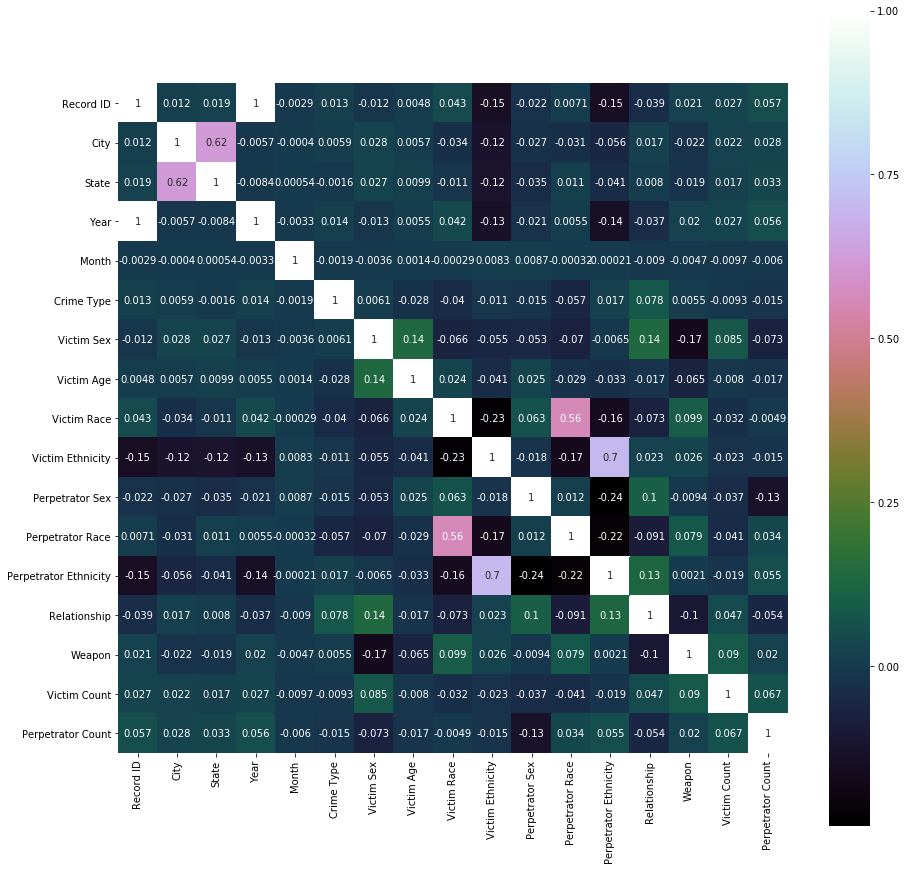

In [48]:
correlation = data.corr()
plt.figure(figsize=(15,15))
sns.heatmap(correlation, vmax=1, square=True,annot=True,cmap='cubehelix')

It's worth a while to look into race and sex/age correlation

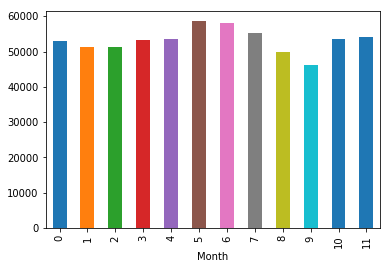

In [49]:
data.groupby(['Month'])['Record ID'].count().plot.bar() # as expected - no corr

In [66]:
data_crime = (data.drop(['State','City','Month'],axis=1))

In [56]:
from sklearn.metrics.regression import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.linear_model import LinearRegression, LassoCV, Lasso
from sklearn.ensemble import RandomForestRegressor

In [73]:
df = data_crime.drop(['Crime Solved','Year', 'Perpetrator Age'],axis=1)
y = df['Perpetrator Race']
X = df.drop('Perpetrator Race', axis=1)

X_train, X_holdout, y_train, y_holdout = train_test_split(X, y, test_size=0.3, random_state=17)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_holdout_scaled = scaler.transform(X_holdout)

/usr/local/lib/python3.5/dist-packages/sklearn/preprocessing/data.py:617: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/usr/local/lib/python3.5/dist-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:8: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  


In [74]:
linreg = LinearRegression()
linreg.fit(X_train_scaled, y_train);

In [75]:
print("Mean squared error (train): %.3f" % mean_squared_error(y_train, linreg.predict(X_train_scaled)))
print("Mean squared error (test): %.3f" % mean_squared_error(y_holdout, linreg.predict(X_holdout_scaled)))

Mean squared error (train): 0.480
Mean squared error (test): 0.482


In [77]:
linreg_coef = pd.DataFrame({'coef': linreg.coef_, 'coef_abs': np.abs(linreg.coef_)},
                           index=df.columns.drop('Perpetrator Race'))

linreg_coef.sort_values(by='coef_abs', ascending=False) # density

,coef,coef_abs
Victim Race,0.471579,0.471579
Perpetrator Ethnicity,-0.210593,0.210593
Victim Ethnicity,0.101196,0.101196
Perpetrator Sex,-0.065572,0.065572
Perpetrator Count,0.036270,0.036270
Victim Age,-0.034152,0.034152
Record ID,-0.032768,0.032768
Victim Count,-0.026759,0.026759
Crime Type,-0.025970,0.025970
Weapon,0.015900,0.015900


In [78]:
# it looks like the victims race is highky dependent on perpetrators race